# Imports

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.figure import Figure
from scipy.signal import correlate
import numpy as np

# Read the data from the csv file
df = pd.read_csv('HEL_12-10-21to08-11-23.csv')
print(df.head())
print(df.describe())

                  date   REG1V.HE   NESTE.HE   ORNBV.HE   KNEBV.HE   OLVAS.HE  \
0  2021-10-12 07:00:00  55.950001  41.820000  35.689999  60.220001  53.099998   
1  2021-10-12 08:00:00  55.799999  41.720001  35.630001  60.419998  53.299999   
2  2021-10-12 09:00:00  55.700001  42.060001  35.400002  60.200001  53.200001   
3  2021-10-12 10:00:00  55.450001  42.009998  35.500000  60.119999  52.900002   
4  2021-10-12 11:00:00  56.000000  42.000000  35.680000  60.480000  52.599998   

    HUH1V.HE   DETEC.HE   ORNAV.HE   CGCBV.HE   VAIAS.HE   ALBBV.HE  \
0  38.529999  23.000000  38.049999  43.139999  46.150002  28.700001   
1  38.560001  23.000000  38.049999  43.500000  45.950001  28.799999   
2  38.349998  23.000000  38.049999  43.619999  45.849998  28.600000   
3  38.220001  23.200001  38.049999  43.480000  45.700001  28.500000   
4  38.349998  23.200001  38.000000  43.279999  45.650002  28.700001   

    VALMT.HE   EQV1V.HE   PON1V.HE  
0  36.459999  24.850000  39.150002  
1  36.599998

# Instant Cross-Correlation

# Time Auto-Correlation

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


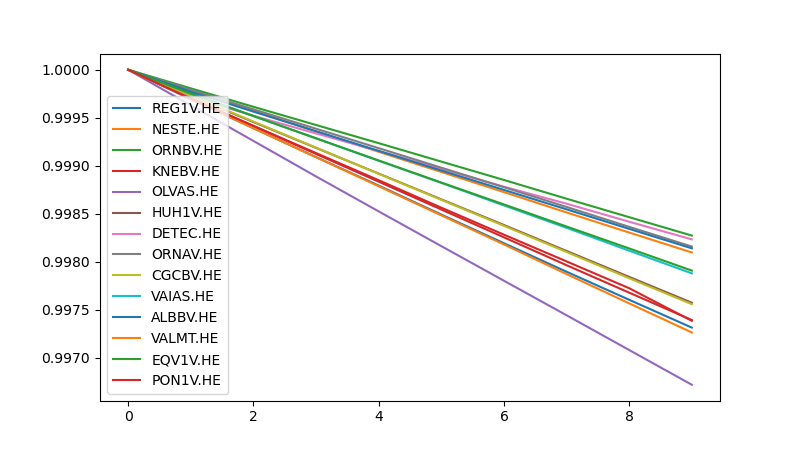

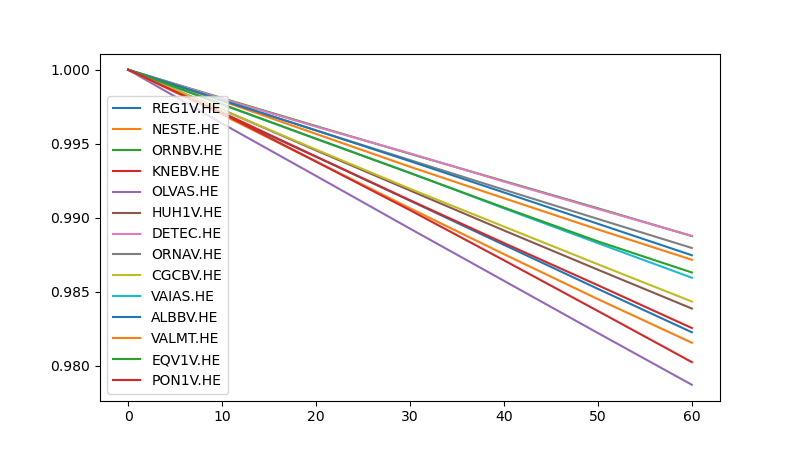

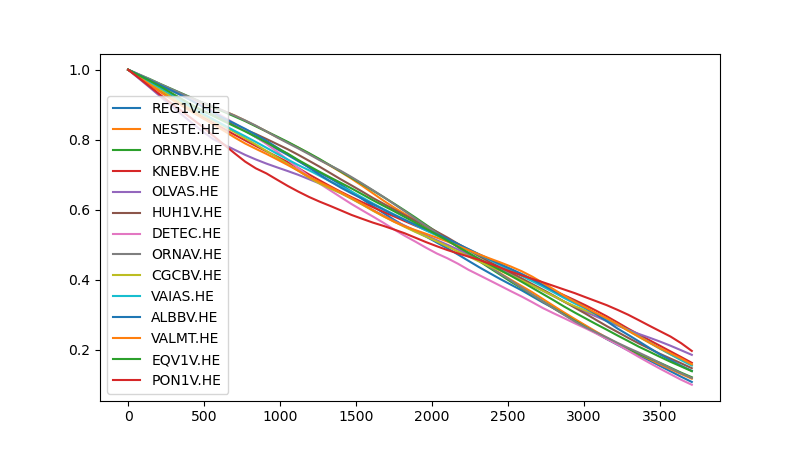

In [8]:
%matplotlib widget
df_custom = df.set_index("date")

def plot_autocorr(df_internal:pd.DataFrame, stop:int, step:int) -> Figure:
    fig = plt.figure(figsize=(8,4.5))

    for column in df_internal.columns:
        x = df_internal[column].to_numpy().flatten()
        x_acorr = correlate(x, x)
        x_acorr = x_acorr[len(x)-1:]/x_acorr.max()
        plt.plot(np.arange(start=0, stop=stop, step=step),
                 x_acorr[0:stop:step], label=column)

    plt.gca().legend(loc="best")
    return fig

fig_hourly = plot_autocorr(df_custom, stop=10, step=1)
fig_hourly.savefig("./figures/acorr_hourly.eps")

fig_daily= plot_autocorr(df_custom, stop=10*7, step=10)
fig_daily.savefig("./figures/acorr_daily.eps")

fig_weekly = plot_autocorr(df_custom, stop=10*7*54, step=10*7)
fig_weekly.savefig("./figures/acorr_weekly.eps")

# Trend-Seasonality Decomposition